# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
%matplotlib inline

from unityagents import UnityEnvironment
import numpy as np
import matplotlib.pyplot as plt


Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [2]:
env = UnityEnvironment(file_name="Banana.app")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 0.0


When finished, you can close the environment.

In [6]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class DQNetwork(nn.Module):
    """Actor (Policy) Model."""
    def __init__(self, state_size, action_size, seed, hidden_layer_sizes = [32, 32, 32]):
        """
        Initialize parameters and build model.
        """
        super(DQNetwork, self).__init__()
        self.seed = torch.manual_seed(seed)
        self.hidden_layers = nn.ModuleList([nn.Linear(state_size, hidden_layer_sizes[0])])
        
        # Add a variable number of more hidden layers
        layer_sizes = zip(hidden_layer_sizes[:-1], hidden_layer_sizes[1:])
        self.hidden_layers.extend([nn.Linear(h1, h2) for h1, h2 in layer_sizes])
        
        self.output = nn.Linear(hidden_layer_sizes[-1], action_size)

    def forward(self, x):
        """Build a network that maps state -> action values."""
        for each in self.hidden_layers:
            x = F.relu(each(x))
        x = self.output(x)
        return x

    
model = DQNetwork(state_size, action_size, 0).to('cpu')
model

DQNetwork(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=37, out_features=32, bias=True)
    (1): Linear(in_features=32, out_features=32, bias=True)
    (2): Linear(in_features=32, out_features=32, bias=True)
  )
  (output): Linear(in_features=32, out_features=4, bias=True)
)

In [8]:
class ReplayBuffer:
    """Fixed-size buffer to store experience tuples."""

    def __init__(self, action_size, buffer_size, batch_size, seed):
        """Initialize a ReplayBuffer object.

        Params
        ======
            action_size (int): dimension of each action
            buffer_size (int): maximum size of buffer
            batch_size (int): size of each training batch
            seed (int): random seed
        """
        self.action_size = action_size
        self.memory = deque(maxlen=buffer_size)  
        self.batch_size = batch_size
        self.experience = namedtuple("Experience", field_names=["state", "action", "reward", "next_state", "done"])
        self.seed = random.seed(seed)
    
    def add(self, state, action, reward, next_state, done):
        """Add a new experience to memory."""
        e = self.experience(state, action, reward, next_state, done)
        self.memory.append(e)
    
    def sample(self):
        """Randomly sample a batch of experiences from memory."""
        experiences = random.sample(self.memory, k=self.batch_size)

        states = torch.from_numpy(np.vstack([e.state for e in experiences if e is not None])).float().to(device)
        actions = torch.from_numpy(np.vstack([e.action for e in experiences if e is not None])).long().to(device)
        rewards = torch.from_numpy(np.vstack([e.reward for e in experiences if e is not None])).float().to(device)
        next_states = torch.from_numpy(np.vstack([e.next_state for e in experiences if e is not None])).float().to(device)
        dones = torch.from_numpy(np.vstack([e.done for e in experiences if e is not None]).astype(np.uint8)).float().to(device)
  
        return (states, actions, rewards, next_states, dones)

    def __len__(self):
        """Return the current size of internal memory."""
        return len(self.memory)

In [9]:
import numpy as np
import random
from collections import namedtuple, deque
import torch
import torch.nn.functional as F
import torch.optim as optim

BUFFER_SIZE = int(1e4)  # replay buffer size
BATCH_SIZE = 64         # minibatch size
GAMMA = 0.99            # discount factor
TAU = 1e-2              # for soft update of target parameters
LR = 1e-3               # learning rate 
UPDATE_EVERY = 16       # how often to update the network

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

class DQNAgent(object):
    
    def __init__(self, state_size, action_size, seed, hidden_layer_sizes = [128, 128, 128]):
        self.state_size = state_size
        self.action_size = action_size
        self.seed = seed
        
        self.network_local = DQNetwork(state_size, action_size, seed, hidden_layer_sizes).to(device)
        self.network_target = DQNetwork(state_size, action_size, seed, hidden_layer_sizes).to(device)
        print("Local Netwrok: ")
        print(self.network_local)
        print("Target Netwrok: ")
        print(self.network_target)
        self.optimizer = optim.Adam(self.network_local.parameters(), lr=LR)
        
        # Replay memory
        self.memory = ReplayBuffer(action_size, BUFFER_SIZE, BATCH_SIZE, seed)
        # Initialize time step (for updating every UPDATE_EVERY steps)
        self.t_step = 0
        self.criterion = nn.SmoothL1Loss()
        
    def step(self, state, action, reward, next_state, done):
        # Save experience in replay memory
        self.memory.add(state, action, reward, next_state, done)
        
        # Learn every UPDATE_EVERY time steps.
        self.t_step = (self.t_step + 1) % UPDATE_EVERY
        if self.t_step == 0:
            # If enough samples are available in memory, get random subset and learn
            if len(self.memory) > BATCH_SIZE:
                experiences = self.memory.sample()
                self.learn(experiences, GAMMA)

    def act(self, state, eps=0.):
        """Returns actions for given state as per current policy.
        
        Params
        ======
            state (array_like): current state
            eps (float): epsilon, for epsilon-greedy action selection
        """
        state = torch.from_numpy(state).float().unsqueeze(0).to(device)
        self.network_local.eval()
        with torch.no_grad():
            action_values = self.network_local(state)
        self.network_local.train()

        # Epsilon-greedy action selection
        if random.random() > eps:
            return np.argmax(action_values.cpu().data.numpy())
        else:
            return random.choice(np.arange(self.action_size))

    def learn(self, experiences, gamma):
        """Update value parameters using given batch of experience tuples.

        Params
        ======
            experiences (Tuple[torch.Variable]): tuple of (s, a, r, s', done) tuples 
            gamma (float): discount factor
        """
        states, actions, rewards, next_states, dones = experiences

        # Get max predicted Q values (for next states) from target model
        Q_targets_next = self.network_target(next_states).detach().max(1)[0].unsqueeze(1)
        # Compute Q targets for current states 
        Q_targets = rewards + (gamma * Q_targets_next * (1 - dones))

        # Get expected Q values from local model
        Q_expected = self.network_local(states).gather(1, actions)

        # Compute loss
        self.optimizer.zero_grad()
        loss = self.criterion(Q_expected, Q_targets)
        # Minimize the loss    
        loss.backward()
        self.optimizer.step()

        # ------------------- update target network ------------------- #
        self.soft_update(self.network_local, self.network_target, TAU)                     

    def soft_update(self, local_model, target_model, tau):
        """Soft update model parameters.
        θ_target = τ*θ_local + (1 - τ)*θ_target

        Params
        ======
            local_model (PyTorch model): weights will be copied from
            target_model (PyTorch model): weights will be copied to
            tau (float): interpolation parameter 
        """
        for target_param, local_param in zip(target_model.parameters(), local_model.parameters()):
            target_param.data.copy_(tau*local_param.data + (1.0-tau)*target_param.data)

In [10]:
dqn_agent = DQNAgent(state_size=state_size, action_size=action_size, seed=0, hidden_layer_sizes=[128, 64, 32])

Local Netwrok: 
DQNetwork(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=37, out_features=128, bias=True)
    (1): Linear(in_features=128, out_features=64, bias=True)
    (2): Linear(in_features=64, out_features=32, bias=True)
  )
  (output): Linear(in_features=32, out_features=4, bias=True)
)
Target Netwrok: 
DQNetwork(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=37, out_features=128, bias=True)
    (1): Linear(in_features=128, out_features=64, bias=True)
    (2): Linear(in_features=64, out_features=32, bias=True)
  )
  (output): Linear(in_features=32, out_features=4, bias=True)
)


In [11]:
def dqn(agent, n_episodes=600, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.99, checkpoint_name="checkpoint.pth"):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        state = env_info.vector_observations[0]            # get the current state
        score = 0
        while True:
            action = agent.act(state, eps)                 # select an action
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            agent.step(state, action, reward, next_state, done)
            score += reward                                # update the score
            state = next_state                             # roll over the state to next time step
            if done:                                       # exit loop if episode finished
                break

        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}\tEpsilon: {:.3f}'.format(i_episode, np.mean(scores_window), eps), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}\tEpsilon: {:.3f}'.format(i_episode, np.mean(scores_window), eps))
        if np.mean(scores_window)>=13.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.network_local.state_dict(), checkpoint_name)
            break
    return scores

In [64]:
env = UnityEnvironment(file_name="Banana.app")
scores = dqn(dqn_agent)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Episode 100	Average Score: 1.72	Epsilon: 0.366
Episode 200	Average Score: 9.03	Epsilon: 0.134
Episode 300	Average Score: 12.41	Epsilon: 0.049
Episode 339	Average Score: 13.01	Epsilon: 0.033
Environment solved in 239 episodes!	Average Score: 13.01


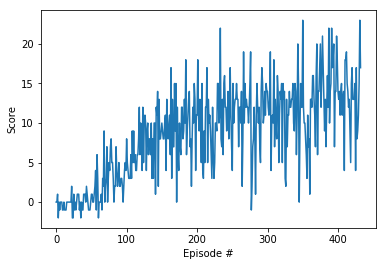

In [14]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [63]:
env.close()

In [21]:
# loading saved checkpoint
state_dict = torch.load("checkpoint.pth")
state_dict.keys()
agent.network_local.load_state_dict(state_dict)
agent.network_target.load_state_dict(state_dict)

In [22]:
env = UnityEnvironment(file_name="Banana.app")
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0
while True:
    action = agent.act(state)                 # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
#     agent.step(state, action, reward, next_state, done)
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
print("Total score: %.f" % score)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Total score: 16


In [23]:
env.close()

In [57]:
class DoubleDQNAgent(object):
    
    def __init__(self, state_size, action_size, seed, hidden_layer_sizes = [128, 128, 128]):
        self.state_size = state_size
        self.action_size = action_size
        self.seed = seed
        
        self.network_local = DQNetwork(state_size, action_size, seed, hidden_layer_sizes).to(device)
        self.network_target = DQNetwork(state_size, action_size, seed, hidden_layer_sizes).to(device)
        print("Local Netwrok: ")
        print(self.network_local)
        print("Target Netwrok: ")
        print(self.network_target)
        self.optimizer = optim.Adam(self.network_local.parameters(), lr=LR)
        
        # Replay memory
        self.memory = ReplayBuffer(action_size, BUFFER_SIZE, BATCH_SIZE, seed)
        # Initialize time step (for updating every UPDATE_EVERY steps)
        self.t_step = 0
        self.criterion = nn.SmoothL1Loss()
        
    def step(self, state, action, reward, next_state, done):
        # Save experience in replay memory
        self.memory.add(state, action, reward, next_state, done)
        
        # Learn every UPDATE_EVERY time steps.
        self.t_step = (self.t_step + 1) % UPDATE_EVERY
        if self.t_step == 0:
            # If enough samples are available in memory, get random subset and learn
            if len(self.memory) > BATCH_SIZE:
                experiences = self.memory.sample()
                self.learn(experiences, GAMMA)

    def act(self, state, eps=0.):
        """Returns actions for given state as per current policy.
        
        Params
        ======
            state (array_like): current state
            eps (float): epsilon, for epsilon-greedy action selection
        """
        state = torch.from_numpy(state).float().unsqueeze(0).to(device)
        self.network_local.eval()
        with torch.no_grad():
            action_values = self.network_local(state)
        self.network_local.train()

        # Epsilon-greedy action selection
        if random.random() > eps:
            return np.argmax(action_values.cpu().data.numpy())
        else:
            return random.choice(np.arange(self.action_size))

    def learn(self, experiences, gamma):
        """Update value parameters using given batch of experience tuples.

        Params
        ======
            experiences (Tuple[torch.Variable]): tuple of (s, a, r, s', done) tuples 
            gamma (float): discount factor
        """
        states, actions, rewards, next_states, dones = experiences
#         print("actions", actions)
        # Double DQN core:
        # use local network to choose action and use target network to evalute that action
        next_actions = self.network_local(next_states).detach().argmax(1).unsqueeze(1)
#         print(next_actions)
        Q_targets_next = self.network_target(next_states).detach().gather(1, next_actions)
        # Compute Q targets for current states 
        Q_targets = rewards + (gamma * Q_targets_next * (1 - dones))

        # Get expected Q values from local model
        Q_expected = self.network_local(states).gather(1, actions)

        # Compute loss
        self.optimizer.zero_grad()
        loss = self.criterion(Q_expected, Q_targets)
        # Minimize the loss    
        loss.backward()
        self.optimizer.step()

        # ------------------- update target network ------------------- #
        self.soft_update(self.network_local, self.network_target, TAU)                     

    def soft_update(self, local_model, target_model, tau):
        """Soft update model parameters.
        θ_target = τ*θ_local + (1 - τ)*θ_target

        Params
        ======
            local_model (PyTorch model): weights will be copied from
            target_model (PyTorch model): weights will be copied to
            tau (float): interpolation parameter 
        """
        for target_param, local_param in zip(target_model.parameters(), local_model.parameters()):
            target_param.data.copy_(tau*local_param.data + (1.0-tau)*target_param.data)

In [58]:
double_dqn_agent = DoubleDQNAgent(state_size=state_size, action_size=action_size, seed=0, hidden_layer_sizes=[128, 64, 32])
env = UnityEnvironment(file_name="Banana.app")

Local Netwrok: 
DQNetwork(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=37, out_features=128, bias=True)
    (1): Linear(in_features=128, out_features=64, bias=True)
    (2): Linear(in_features=64, out_features=32, bias=True)
  )
  (output): Linear(in_features=32, out_features=4, bias=True)
)
Target Netwrok: 
DQNetwork(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=37, out_features=128, bias=True)
    (1): Linear(in_features=128, out_features=64, bias=True)
    (2): Linear(in_features=64, out_features=32, bias=True)
  )
  (output): Linear(in_features=32, out_features=4, bias=True)
)


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [59]:
scores = dqn(double_dqn_agent, checkpoint_name="double-dqn-checkpoint.pth")

Episode 100	Average Score: 1.98	Epsilon: 0.366
Episode 200	Average Score: 7.59	Epsilon: 0.134
Episode 300	Average Score: 11.23	Epsilon: 0.049
Episode 363	Average Score: 13.03	Epsilon: 0.026
Environment solved in 263 episodes!	Average Score: 13.03


In [65]:
env.close()

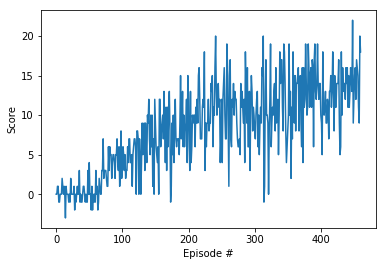

In [66]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

## Prioritized Experience Replay

Prioritized Experience Replay (PER) was introduced in 2015 by Tom Schaul. The idea is that some experiences may be more important than others for our training, but might occur less frequently.

Because we sample the batch uniformly (selecting the experiences randomly) these rich experiences that occur rarely have practically no chance to be selected.

That’s why, with PER, we try to change the sampling distribution by using a criterion to define the priority of each tuple of experience.

We want to take in priority experience where there is a big difference between our prediction and the TD target, since it means that we have a lot to learn about it.

In [51]:
class PrioritizedReplayBuffer:
    """Fixed-size buffer to store experience tuples."""

    def __init__(self, action_size, buffer_size, batch_size, seed):
        """Initialize a ReplayBuffer object.

        Params
        ======
            action_size (int): dimension of each action
            buffer_size (int): maximum size of buffer
            batch_size (int): size of each training batch
            seed (int): random seed
        """
        self.action_size = action_size
        self.memory = deque(maxlen=buffer_size)
        self.batch_size = batch_size
        self.experience = namedtuple("Experience", field_names=["state", "action", "reward", "next_state", "priority", "done"])
        self.seed = random.seed(seed)
        self.priorities = deque(maxlen=buffer_size)
        self.max_priority = 1.0
    
        self.b = 1.0
    def add(self, state, action, reward, next_state, done):
        """Add a new experience to memory."""
        
        # Init priority for new comming memory
#         priorities = [m.priority for m in self.memory]
#         max_priority = self.max_priority if priorities else 1.0
        e = self.experience(state, action, reward, next_state, self.max_priority, done)
        self.memory.append(e)
        self.priorities.append(self.max_priority)
        
    def sample(self, a=1, b=1):
        
        """Sample a batch of experiences from memory by priority."""
        priorities = np.array(self.priorities)
        probs = priorities ** a /  sum(priorities ** a)
#         print(probs)
        sample_idxes = np.random.choice(np.arange(len(self.memory)), size=self.batch_size, p=probs)
        experiences = []
        for i in sample_idxes:
            experiences.append(self.memory[i])
        states = torch.from_numpy(np.vstack([e.state for e in experiences if e is not None])).float().to(device)
        actions = torch.from_numpy(np.vstack([e.action for e in experiences if e is not None])).long().to(device)
        rewards = torch.from_numpy(np.vstack([e.reward for e in experiences if e is not None])).float().to(device)
        next_states = torch.from_numpy(np.vstack([e.next_state for e in experiences if e is not None])).float().to(device)
        dones = torch.from_numpy(np.vstack([e.done for e in experiences if e is not None]).astype(np.uint8)).float().to(device)
        
        is_weights = np.power(len(self.memory) * probs, -self.b)
#         is_weights /= is_weights.max()
        is_weights = torch.from_numpy(is_weights).float().to(device)
#         print(is_weights)

        return (sample_idxes, states, actions, rewards, next_states, is_weights, dones)
    
    def update(self, memory_idxes, priorities):
        for i, p in zip(memory_idxes, priorities):
            
            state, action, reward, next_state, priority, done = self.memory[i]
#             priority_diff = p - priority
#             self.total_priority += priority_diff
            if p > self.max_priority:
                self.max_priority = p
            self.memory[i] = self.experience(state, action, reward, next_state, p, done)
            self.priorities[i] = p
        

    def __len__(self):
        """Return the current size of internal memory."""
        return len(self.memory)

In [52]:
class WeightedLoss(nn.Module):
    def __init__(self):
        super(WeightedLoss, self).__init__()
        return

    def forward(self, weights, inputs, targets):
        t = torch.abs(inputs - targets)
        zi = torch.where(t < 1, 0.5 * t ** 2, t - 0.5)
        loss = (weights * zi).sum()
#         loss = torch.mean(zi)
        return loss

class PERDQNAgent(object):
    
    def __init__(self, state_size, action_size, seed, hidden_layer_sizes = [128, 128, 128]):
        self.state_size = state_size
        self.action_size = action_size
        self.seed = seed
        self.e = 1e-1
        
        self.network_local = DQNetwork(state_size, action_size, seed, hidden_layer_sizes).to(device)
        self.network_target = DQNetwork(state_size, action_size, seed, hidden_layer_sizes).to(device)
        print("Local Netwrok: ")
        print(self.network_local)
        print("Target Netwrok: ")
        print(self.network_target)
        self.optimizer = optim.Adam(self.network_local.parameters(), lr=LR)
        
        # Replay memory
        self.memory = PrioritizedReplayBuffer(action_size, BUFFER_SIZE, BATCH_SIZE, seed)
        # Initialize time step (for updating every UPDATE_EVERY steps)
        self.t_step = 0
        self.criterion = WeightedLoss()
        
    def step(self, state, action, reward, next_state, done):
        # Save experience in replay memory
        
        self.memory.add(state, action, reward, next_state, done)
        
        
        
        # Learn every UPDATE_EVERY time steps.
        self.t_step = (self.t_step + 1) % UPDATE_EVERY
        if self.t_step == 0:
            # If enough samples are available in memory, get random subset and learn
            if len(self.memory) > BATCH_SIZE:
                experiences = self.memory.sample(b=1)
                self.learn(experiences, GAMMA)

    def act(self, state, eps=0.):
        """Returns actions for given state as per current policy.
        
        Params
        ======
            state (array_like): current state
            eps (float): epsilon, for epsilon-greedy action selection
        """
        state = torch.from_numpy(state).float().unsqueeze(0).to(device)
        self.network_local.eval()
        with torch.no_grad():
            action_values = self.network_local(state)
        self.network_local.train()

        # Epsilon-greedy action selection
        if random.random() > eps:
            return np.argmax(action_values.cpu().data.numpy())
        else:
            return random.choice(np.arange(self.action_size))

    def learn(self, experiences, gamma):
        """Update value parameters using given batch of experience tuples.

        Params
        ======
            experiences (Tuple[torch.Variable]): tuple of (s, a, r, s', done) tuples 
            gamma (float): discount factor
        """
        idxes, states, actions, rewards, next_states, is_weights, dones = experiences

        # Get max predicted Q values (for next states) from target model
        Q_targets_next = self.network_target(next_states).detach().max(1)[0].unsqueeze(1)
        # Compute Q targets for current states 
        Q_targets = rewards + (gamma * Q_targets_next * (1 - dones))

        # Get expected Q values from local model
        Q_expected = self.network_local(states).gather(1, actions)
        
        # Get priorities and update
        priorities = torch.abs(Q_targets - Q_expected) + 1.
        
        priorities = priorities.squeeze(1).cpu().data.numpy()
#         print("priorities", priorities)
        self.memory.update(idxes, priorities)
        
        # Compute loss
        self.optimizer.zero_grad()
        loss = self.criterion(is_weights, Q_expected, Q_targets)
        # Minimize the loss    
#         print(loss)
        loss.backward()
        self.optimizer.step()

        # ------------------- update target network ------------------- #
        self.soft_update(self.network_local, self.network_target, TAU)                     

    def soft_update(self, local_model, target_model, tau):
        """Soft update model parameters.
        θ_target = τ*θ_local + (1 - τ)*θ_target

        Params
        ======
            local_model (PyTorch model): weights will be copied from
            target_model (PyTorch model): weights will be copied to
            tau (float): interpolation parameter 
        """
        for target_param, local_param in zip(target_model.parameters(), local_model.parameters()):
            target_param.data.copy_(tau*local_param.data + (1.0-tau)*target_param.data)

In [53]:
per_dqn_agent = PERDQNAgent(state_size=state_size, action_size=action_size, seed=0, hidden_layer_sizes=[128, 64, 32])
env = UnityEnvironment(file_name="Banana.app")

Local Netwrok: 
DQNetwork(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=37, out_features=128, bias=True)
    (1): Linear(in_features=128, out_features=64, bias=True)
    (2): Linear(in_features=64, out_features=32, bias=True)
  )
  (output): Linear(in_features=32, out_features=4, bias=True)
)
Target Netwrok: 
DQNetwork(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=37, out_features=128, bias=True)
    (1): Linear(in_features=128, out_features=64, bias=True)
    (2): Linear(in_features=64, out_features=32, bias=True)
  )
  (output): Linear(in_features=32, out_features=4, bias=True)
)


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [54]:
scores = dqn(per_dqn_agent, checkpoint_name="per-dqn-checkpoint.pth")

Episode 100	Average Score: 1.67	Epsilon: 0.366
Episode 200	Average Score: 8.04	Epsilon: 0.134
Episode 300	Average Score: 12.88	Epsilon: 0.049
Episode 302	Average Score: 13.07	Epsilon: 0.048
Environment solved in 202 episodes!	Average Score: 13.07


In [55]:
env.close()

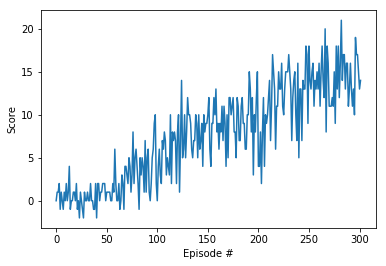

In [56]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()